In [1]:
%matplotlib inline
import pandas as pd
import numpy
import scipy
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns

In [2]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)

In [3]:
file_name = r'data/hackerrank_email/training_dataset.csv'
data = pd.read_csv(file_name)
print(data.shape)

(486048, 54)


In [4]:
data.head(10)

,user_id,mail_id,mail_category,mail_type,sent_time,open_time,click_time,unsubscribe_time,last_online,hacker_created_at,...,submissions_count_contest_1_days,submissions_count_contest_30_days,submissions_count_contest_365_days,submissions_count_contest_7_days,submissions_count_master,submissions_count_master_1_days,submissions_count_master_30_days,submissions_count_master_365_days,submissions_count_master_7_days,unsubscribed
0,AR+tMy3H/E+Re8Id20zUIz+amJkv6KU12o+BrgIDin0=,DQ/4I+GIOz2ZoIiK0Lg0AkwnI35XotghgUK/MYc101I=,mail_category_2,mail_type_1,1463497837,1.464e+09,NaN,NaN,1.460e+09,1432533023,...,0,0,0,0,13,0,0,13,0,False
1,1P4AOvdzJzhDSHi7jJ3udWv4ajpKxOn4T/rCLv4PrXU=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,mail_category_1,mail_type_1,1461357640,NaN,NaN,NaN,1.461e+09,1432184291,...,0,3,16,0,83,0,43,83,4,False
2,OEfFUcsTAGInCfsHuLZuIgdSNtuNsg8EdfN98VUZVTs=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,mail_category_1,mail_type_1,1463499639,NaN,NaN,NaN,1.463e+09,1433045937,...,0,0,0,0,16,0,3,16,0,False
3,1P4AOvdzJzhDSHi7jJ3udWv4ajpKxOn4T/rCLv4PrXU=,EHNBRbi6i9KO6cMHsuDPFjZVp2cY3RH+BiOKwPwzLQs=,mail_category_1,mail_type_1,1463182983,NaN,NaN,NaN,1.463e+09,1432184291,...,0,0,16,0,85,0,9,85,0,False
4,CYRcuV0cR0algMZJ1N6+3uKcqi8iu+6tJNzmBbmgN7o=,K0y/NW59TJkYc5y0HUwDeAXrewYT0JQlkcozz0s2V5Q=,mail_category_4,mail_type_1,1461855019,NaN,NaN,NaN,1.461e+09,1432998058,...,0,1,17,0,43,0,0,43,0,False
5,UREtRIcAzBFKmMt9ZSkFLofOWKAKmzsDD7BwrdxcPuk=,UGATDXARg7jMEInKH7oXgty2nwxnwD2l0OW/8Nsa0MI=,mail_category_6,mail_type_1,1459927021,NaN,NaN,NaN,1.458e+09,1431945704,...,0,0,13,0,88,0,0,88,0,False
6,NiDHS4AU/QOs3ppF618O6bUg8BxJd+EV4Ek26KWrDc0=,qE9zgWiITYA97RUiN4X/t9IVWLViLz+lKijaYegyBiQ=,mail_category_1,mail_type_1,1460230930,1.460e+09,NaN,NaN,1.460e+09,1432658834,...,0,0,0,0,20,0,12,20,12,False
7,sGNmP4gGVwh3YBpXtq6ZI05PIa3Z0iUaF+ujKonctu0=,BL3z4RtiyfIDydaRYWX2ZXL6IX10QH1yG5ak1s/8Lls=,mail_category_1,mail_type_1,1462282973,NaN,NaN,NaN,1.462e+09,1432294499,...,0,0,0,0,14,0,14,14,14,False
8,nyoFu8qU0B5viJDXfrVRQ65ytOSSSY3c7okcjo1Z76M=,4+EEK8RbNYwuFCHznY9XSRCV4Yek60bHVgnP3jtjjzk=,mail_category_13,mail_type_2,1462888545,1.463e+09,NaN,NaN,1.463e+09,1432795707,...,0,19,265,0,129,0,0,129,0,False
9,A2EUbD7QN5SXpJ7FhPY5Ne7zwjwYhRvAheGskLl0Os8=,4+EEK8RbNYwuFCHznY9XSRCV4Yek60bHVgnP3jtjjzk=,mail_category_13,mail_type_2,1462888549,NaN,NaN,NaN,1.462e+09,1432059719,...,0,0,0,0,3,0,0,3,0,False


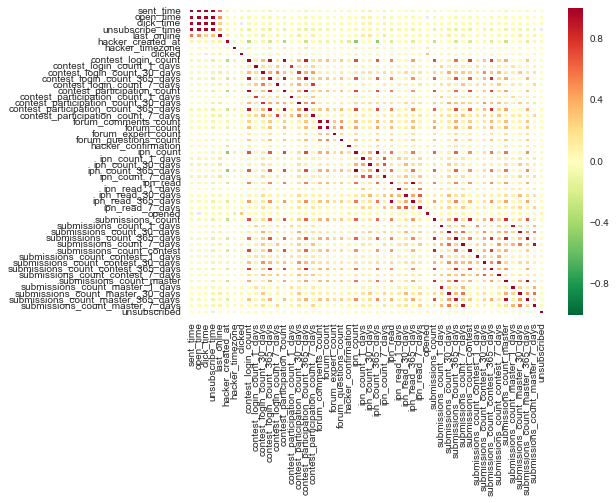

In [5]:
correlations = data.corr(method='pearson')
sns.heatmap(correlations, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0, linewidths=2.5)

In [6]:
print(data.shape[0])
opened = (len(data[data['opened'] == True])) 
not_opened = (len(data[data['opened'] == False]))
print ('Opened: ' + str(opened) + '; Unopened: ' + str(not_opened) + '')

486048
Opened: 161347; Unopened: 324701


In [7]:
data_sub = data[['clicked', 'unsubscribed', 'submissions_count_master_7_days', 'contest_login_count_30_days', 'contest_login_count_7_days',
'hacker_confirmation','opened']]
data_sub.corr(method='pearson')

,clicked,unsubscribed,submissions_count_master_7_days,contest_login_count_30_days,contest_login_count_7_days,hacker_confirmation,opened
clicked,1.000,-0.006,0.064,0.062,0.062,0.026,0.308
unsubscribed,-0.006,1.000,-0.003,-0.002,0.007,0.002,0.075
submissions_count_master_7_days,0.064,-0.003,1.000,0.176,0.223,0.047,0.055
contest_login_count_30_days,0.062,-0.002,0.176,1.000,0.547,0.004,0.049
contest_login_count_7_days,0.062,0.007,0.223,0.547,1.000,-0.025,0.043
hacker_confirmation,0.026,0.002,0.047,0.004,-0.025,1.000,0.076
opened,0.308,0.075,0.055,0.049,0.043,0.076,1.000


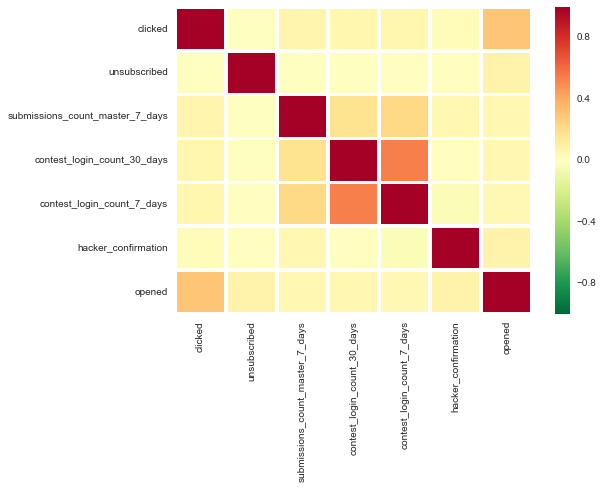

In [8]:
correlations_sub = data_sub.corr(method='pearson')
sns.heatmap(correlations_sub, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0, linewidths=2.5)

In [9]:
# opened_map = {True:1,False:0} #opened = 1, unopened = 0
# data_sub['opened'] = data_sub['opened'].map(opened_map)
data_sub['opened'] = data_sub['opened'].astype(int)
data_sub['clicked'] = data_sub['clicked'].astype(int)
data_sub['unsubscribed'] = data_sub['unsubscribed'].astype(int)
data_sub['hacker_confirmation'] = data_sub['hacker_confirmation'].astype(int)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

In [10]:
data_sub.head(5)

,clicked,unsubscribed,submissions_count_master_7_days,contest_login_count_30_days,contest_login_count_7_days,hacker_confirmation,opened
0,0,0,0,0,0,1,1
1,0,0,4,1,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


In [11]:
#list(data.columns.values)

In [12]:
#data.dtypes

In [13]:
num_folds = 10
num_instances = len(data_sub)
kfold_seed = 7
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=kfold_seed) 
model = LogisticRegression()

In [14]:
X = data_sub.values[:,0:6]
Y = data_sub.values[:,6]
print(X[1])
print(Y[1])

[0 0 4 1 0 1]
0


In [15]:
def cross_validation_score(mod, X, Y, kfold, scoring):
    score = cross_validation.cross_val_score(mod, X, Y, cv=kfold, scoring=scoring) 
    return (("Scoring: %s; Accuracy: %.3f (%.3f)") % (scoring, score.mean(), score.std()), score)

In [16]:
cross_val_scoring = ['accuracy','log_loss', 'roc_auc' ]
for scoring in cross_val_scoring:    
    result = cross_validation_score(model, X, Y, kfold, scoring)
    print(result[0])

Scoring: accuracy; Accuracy: 0.719 (0.021)
Scoring: log_loss; Accuracy: -0.582 (0.020)
Scoring: roc_auc; Accuracy: 0.622 (0.023)


In [17]:
test_size = 0.33
train_test_seed = 7
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=train_test_seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)

In [18]:
pd.DataFrame(matrix, index=['0 (Actual)', '1 (Actual)'], columns=['0 (Predicted)', '1 (Predicted)'])

,0 (Predicted),1 (Predicted)
0 (Actual),106640,764
1 (Actual),44119,8873


In [19]:
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.71      0.99      0.83    107404
          1       0.92      0.17      0.28     52992

avg / total       0.78      0.72      0.65    160396



In [20]:
# import xgboost
# from sklearn.metrics import accuracy_score

# seed = 7
# test_size = 0.33
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=seed)
# # fit model no training data
# model = xgboost.XGBClassifier()
# model.fit(X_train, y_train)
# # make predictions for test data
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = [LogisticRegression(), LinearDiscriminantAnalysis(), RandomForestClassifier(n_estimators=100)] 
#DecisionTreeClassifier(),  SVC()] #KNeighborsClassifier(),

In [22]:
def assess_models(model, X, Y):
    seed = 7
    num_instances = len(X)
    test_size = 0.33
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    #model = LinearDiscriminantAnalysis()
    results = cross_validation.cross_val_score(model, X, Y, cv=kfold)
    print(results.mean())

#     X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=seed)
#     # fit model no training data
#     #model = xgboost.XGBClassifier()
#     model.fit(X_train, y_train)
#     # make predictions for test data
#     y_pred = model.predict(X_test)
#     predictions = [round(value) for value in y_pred]
#     # evaluate predictions
#     accuracy = accuracy_score(y_test, predictions)
#     print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [23]:
# for mod in models:
#     assess_models(mod,X,Y)

In [29]:
#LogisticRegression
assess_models(models[0],X,Y)

0.718750138874


In [25]:
#LinearDiscriminantAnalysis
#assess_models(models[1],X,Y) #0.718828320681

0.718828320681


In [26]:
#RandomForest
#assess_models(models[2],X,Y) 0.717124781147

0.717124781147


In [27]:
#assess_models(models[3],X,Y)

In [28]:
#assess_models(models[1],X,Y)